# **DATA SCIENCE ITINERARY - IT ACADEMY**

# **Sprint 13. Relational Databases**

# MySQL Database

PYHON NEEDS A **MYSQL DRIVER** TO ACCESS THE MYSQL DATABASE. TO TEST IF THE INSTALLATION WAS SUCCESSFUL WE IMPORT THE NEXT CONTENT:

In [252]:
import mysql.connector
from mysql.connector import connect, Error
from getpass import getpass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **EXERCISE 1**

**STATEMENT:** Create a simple relational database using MySQL (https://www.mysql.com/) and connect it to Python

START BY CREATING A CONNECTION TO THE DATABASE. USE A USERNAME AND PASSWORD FROM YOUR **MYSQL DATABASE**

In [253]:
# Create a UserName and Password
user_name = getpass('Username: ') #root
password = getpass('Password: ') # adria98

my_database = mysql.connector.connect(host = '192.168.64.2',user = user_name, password = password)
print(my_database)

CREATE A CONNECTION CURSOR

In [254]:
my_database.reconnect() # We reopen the connection
mycursor = my_database.cursor()

In [255]:
# We show the different Databases we have created
mycursor.execute('SHOW DATABASES')

for x in mycursor:
    print(x)

('golesfifa',)
('information_schema',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('test',)
('zara_store',)


OUR DATABASE OF INTEREST IS **'ZARA_STORE'**. WE CREATE A CONNECTION WITH THE DATABASE.

In [256]:
zara_store_db = mysql.connector.connect(
    host = '192.168.64.2', user = user_name, password = password,
    database = 'zara_store'
)

zara_store_db.reconnect() # We reopen the connection
mycursor = zara_store_db.cursor()

In [257]:
mycursor.execute('SHOW TABLES')
print(mycursor)

MySQLCursor: SHOW TABLES


In [258]:
# We show the tables created in MySQL 

for x in mycursor:
    print(x)

('CUSTOMER',)
('ESTABLISHMENT',)
('PRODUCT',)
('PRODUCT_TYPE',)
('TRANSACTION',)
('WORKER',)


NOW WE ARE GOING TO FILL THE TABLES WE HAD CREATED IN **MYSQL** WITH DATA.

#### **INSERT DATA INTO CUSTOMERS**

In [260]:
sql = 'INSERT INTO CUSTOMER(Customer_ID ,Customer_name, Customer_phone, \
Customer_email, Customer_zip) VALUES (%s, %s, %s, %s, %s)'

values = [
    ('1','Ruben', '693942032', 'r.ruiz@gmail.com', '08982'),
    ('2', 'Gemma', '657432222', 'g.perez@gmail.com', '08752'),
    ('3', 'Celia', '657432228', 'c.moran@gmail.com', '03621'),
    ('4', 'Andrea', '973908309', 'a.moran@gmail.com', '07592'),
    ('5', 'David', '637432678', 'd.morillas@gmail.com', '04239'),
    ('6', 'Laura', '655432888', 'l.rodriguez@gmail.com', '02834'),
    ('7', 'Jordi Muñoz', '699432888', 'j.muñoz@gmail.com', '06421'),
    ('8', 'Jordi Perez ', '657432771', 'j.perez@gmail.com', '07524'),
    ('9', 'Adria', '697981032', 'a.nova@gmail.com', '08980'),
    ('10', 'Alejandro', '662143288', 'a.nuñez@gmail.com', '05421'),
    ('11', 'Carla', '657145808', 'c.perez@gmail.com', '04362'),
    ('12', 'Marta', '667430089', 'm.plaza@gmail.com', '02675'),
    ('13', 'Nuria', '657423488', 'n.sandin@gmail.com', '02563'),
    ('14', 'Alex', '637432678', 'a.sevillano@gmail.com', '02369'),
    ('15','Xavi', '655432888', 'x.romero@gmail.com', '05247'),
    ('16', 'Albert', '699432888', 'a.jolpes@gmail.com', '03675'),
    ('17', 'Gerard', '657432771', 'g.sanmiguel@gmail.com', '03652'),
    ('18', 'Roger', '621432888', 'r.vidal@gmail.com', '01245'),
    ('19', 'Rosa', '657145808', 'r.siposa@gmail.com', '02642'),
    ('20', 'Laia', '667430089', 'l.valero@gmail.com', '02102'),
]

mycursor.executemany(sql, values)
zara_store_db.commit()

"\nsql = 'INSERT INTO CUSTOMER(Customer_ID ,Customer_name, Customer_phone, Customer_email, Customer_zip) VALUES (%s, %s, %s, %s, %s)'\n\nvalues = [\n    ('1','Ruben', '693942032', 'r.ruiz@gmail.com', '08982'),\n    ('2', 'Gemma', '657432222', 'g.perez@gmail.com', '08752'),\n    ('3', 'Celia', '657432228', 'c.moran@gmail.com', '03621'),\n    ('4', 'Andrea', '973908309', 'a.moran@gmail.com', '07592'),\n    ('5', 'David', '637432678', 'd.morillas@gmail.com', '04239'),\n    ('6', 'Laura', '655432888', 'l.rodriguez@gmail.com', '02834'),\n    ('7', 'Jordi Muñoz', '699432888', 'j.muñoz@gmail.com', '06421'),\n    ('8', 'Jordi Perez ', '657432771', 'j.perez@gmail.com', '07524'),\n    ('9', 'Adria', '697981032', 'a.nova@gmail.com', '08980'),\n    ('10', 'Alejandro', '662143288', 'a.nuñez@gmail.com', '05421'),\n    ('11', 'Carla', '657145808', 'c.perez@gmail.com', '04362'),\n    ('12', 'Marta', '667430089', 'm.plaza@gmail.com', '02675'),\n    ('13', 'Nuria', '657423488', 'n.sandin@gmail.com', '02

In [ ]:
# Check CUSTOMER Data Table

query ='SELECT * FROM CUSTOMER'

mycursor.execute(query)

result = mycursor.fetchall()

for register in result:
    print(register)

(1, 'Ruben', 693942032, 'r.ruiz@gmail.com', 8982)
(2, 'Gemma', 657432222, 'g.perez@gmail.com', 8752)
(3, 'Celia', 657432228, 'c.moran@gmail.com', 3621)
(4, 'Andrea', 973908309, 'a.moran@gmail.com', 7592)
(5, 'David', 637432678, 'd.morillas@gmail.com', 4239)
(6, 'Laura', 655432888, 'l.rodriguez@gmail.com', 2834)
(7, 'Jordi Muñoz', 699432888, 'j.muñoz@gmail.com', 6421)
(8, 'Jordi Perez ', 657432771, 'j.perez@gmail.com', 7524)
(9, 'Adria', 697981032, 'a.nova@gmail.com', 8980)
(10, 'Alejandro', 662143288, 'a.nuñez@gmail.com', 5421)
(11, 'Carla', 657145808, 'c.perez@gmail.com', 4362)
(12, 'Marta', 667430089, 'm.plaza@gmail.com', 2675)
(13, 'Nuria', 657423488, 'n.sandin@gmail.com', 2563)
(14, 'Alex', 637432678, 'a.sevillano@gmail.com', 2369)
(15, 'Xavi', 655432888, 'x.romero@gmail.com', 5247)
(16, 'Albert', 699432888, 'a.jolpes@gmail.com', 3675)
(17, 'Gerard', 657432771, 'g.sanmiguel@gmail.com', 3652)
(18, 'Roger', 621432888, 'r.vidal@gmail.com', 1245)
(19, 'Rosa', 657145808, 'r.siposa@gmail

#### **INSERT DATA INTO ESTABLISHMENT**

In [ ]:
sql = 'INSERT INTO ESTABLISHMENT (Establishment_ID, Estblishment_name, \
Establishment_location, Establishment_phone, Establishment_email) VALUES \
(%s, %s, %s, %s, %s)'

values = [
    ('1', 'Zara Barcelona', 'Pg. de Gràcia, 16, 08008 Barcelona', '933187675', 'zara.barcelona@hotmail.com'),
    ('2', 'Zara Madrid', 'C. de Preciados, 18, 28013 Madrid', '915210958', 'zara.madrid@hotmail.com'),
    ('3', 'Zara Sevilla', 'C. Rioja, 10, 41002 Sevilla', '954211058', 'zara.sevilla@hotmail.com'),
    ('4', 'Zara Valencia', 'Carrer de Colón, 11, 46004 València', '963527603', 'zara.valencia@hotmail.com'),
    ('5', 'Zara Bilbao', 'Don Diego López Haroko, 23, 48009 Bilbo', '946181300', 'zara.bilbao@hotmail.com'),
    ('6', 'Zara Lleida', 'Carrer Major, 47, 25007 Lleida', '973280184', 'zara.lleida@hotmail.com'),
]

mycursor.executemany(sql, values)
zara_store_db.commit()

In [ ]:
# Check ESTABLISHMENT Data Table

query ='SELECT * FROM ESTABLISHMENT'

mycursor.execute(query)

result = mycursor.fetchall()

for register in result:
    print(register)

(1, 'Zara Barcelona', 'Pg. de Gràcia, 16, 08008 Barcelona', 933187675, 'zara.barcelona@hotmail.com')
(2, 'Zara Madrid', 'C. de Preciados, 18, 28013 Madrid', 915210958, 'zara.madrid@hotmail.com')
(3, 'Zara Sevilla', 'C. Rioja, 10, 41002 Sevilla', 954211058, 'zara.sevilla@hotmail.com')
(4, 'Zara Valencia', 'Carrer de Colón, 11, 46004 València', 963527603, 'zara.valencia@hotmail.com')
(5, 'Zara Bilbao', 'Don Diego López Haroko, 23, 48009 Bilbo', 946181300, 'zara.bilbao@hotmail.com')
(6, 'Zara Lleida', 'Carrer Major, 47, 25007 Lleida', 973280184, 'zara.lleida@hotmail.com')


#### **INSERT DATA INTO PRODUCT_TYPE**

In [ ]:
sql = 'INSERT INTO PRODUCT_TYPE( Type_ID, Type_category)\
VALUES (%s, %s)'

values = [
    (1, 'Shirt'),
    (2, 'Jacket'),
    (3, 'Trouser'),
    (4, 'Coat'),
    (5, 'Shoes'),
    (6, 'Bikini'),
    (7, 'Track Suit'),
    (8, 'Dress'),
    (9, 'Skirt'),
    (10, 'Pyjamas'),
]
mycursor.executemany(sql, values)
zara_store_db.commit()

In [ ]:
# Check PRODUCT TYPE Data Table

query ='SELECT * FROM PRODUCT_TYPE'

mycursor.execute(query)

result = mycursor.fetchall()

for register in result:
    print(register)

(1, 'Shirt')
(2, 'Jacket')
(3, 'Trouser')
(4, 'Coat')
(5, 'Shoes')
(6, 'Bikini')
(7, 'Track Suit')
(8, 'Dress')
(9, 'Skirt')
(10, 'Pyjamas')


#### **INSERT DATA INTO WORKER**

In [ ]:
sql = 'INSERT INTO WORKER(Worker_ID, Establishment_ID, \
Worker_name, Worker_department, Worker_phone, Worker_contractDate)\
VALUES (%s, %s, %s, %s, %s, %s)'

# I put 2 workers for each Zara

values = [
    ('1', '1', 'Pedro Risotas', 'Store Clerk', '697521345', '2019-2-04'),
    ('2', '1', 'Maria Dominguin', 'Manager', '697139345', '2011-9-14'),
    ('3', '2', 'Florentino Perez', 'CEO', '676342152', '2006-2-23'),
    ('4', '2', 'Karim Boufal', 'Store Clerk', '675213658', '2021-1-01'),
    ('5', '3', 'Pedro Sanz', 'Shop assistant', '697521421', '2018-7-09'),
    ('6', '3', 'Cristina Flanz', 'Manager', '642631345', '2015-1-07'),
    ('7', '4', 'Laia Samper', 'Store Clerk', '686321596', '2011-7-04'),
    ('8', '4', 'Clara Rodriguez', 'Store Clerk', '621659863', '2012-4-12'),
    ('9', '5', 'Adrian Ruiz', 'Shop Assistant', '653621965', '2016-10-22'),
    ('10', '5', 'Martin LLuc', 'Shop Assistant', '612547856', '2018-12-04'),
    ('11', '6', 'Lucia Pujol', 'Manager', '675326985', '2015-4-24'),
    ('12', '6', 'Mario Sancet', 'Shop Assistant', '623659632', '2013-6-14'),
]

mycursor.executemany(sql, values)
zara_store_db.commit()

In [ ]:
# Check WORKER Data Table

query ='SELECT * FROM WORKER'

mycursor.execute(query)

result = mycursor.fetchall()

for register in result:
    print(register)

(1, 1, 'Pedro Risotas', 'Store Clerk', 697521345, datetime.datetime(2019, 2, 4, 0, 0))
(2, 1, 'Maria Dominguin', 'Manager', 697139345, datetime.datetime(2011, 9, 14, 0, 0))
(3, 2, 'Florentino Perez', 'CEO', 676342152, datetime.datetime(2006, 2, 23, 0, 0))
(4, 2, 'Karim Boufal', 'Store Clerk', 675213658, datetime.datetime(2021, 1, 1, 0, 0))
(5, 3, 'Pedro Sanz', 'Shop assistant', 697521421, datetime.datetime(2018, 7, 9, 0, 0))
(6, 3, 'Cristina Flanz', 'Manager', 642631345, datetime.datetime(2015, 1, 7, 0, 0))
(7, 4, 'Laia Samper', 'Store Clerk', 686321596, datetime.datetime(2011, 7, 4, 0, 0))
(8, 4, 'Clara Rodriguez', 'Store Clerk', 621659863, datetime.datetime(2012, 4, 12, 0, 0))
(9, 5, 'Adrian Ruiz', 'Shop Assistant', 653621965, datetime.datetime(2016, 10, 22, 0, 0))
(10, 5, 'Martin LLuc', 'Shop Assistant', 612547856, datetime.datetime(2018, 12, 4, 0, 0))
(11, 6, 'Lucia Pujol', 'Manager', 675326985, datetime.datetime(2015, 4, 24, 0, 0))
(12, 6, 'Mario Sancet', 'Shop Assistant', 6236596

#### **INSERT DATA INTO PRODUCT**

In [ ]:
sql = 'INSERT INTO PRODUCT(Product_ID, Type_ID, \
Product_name, Product_price, Product_size, Product_color)\
VALUES (%s, %s, %s, %s, %s, %s)'

values = [
    # Skirt
    ('1', '9', 'Contrast Skort', '25.95', '38', 'pink'),
    ('2', '9', 'Skort with Golden Buttons', '25.95', '40', 'Blue'),
    # Trousers
    ('3', '3', 'Masculine Lnes Trousers', '39.95', '42', 'Mustard'),
    ('4', '3', 'Straight Trousers with Metal Buttons', '27.95', '39', 'White'),
    # Jacket
    ('5', '2', 'Faux Leather Fitted Jacket', '49.90', '40', 'Black'),
    ('6', '2', 'Metal Button Jacket', '89.90', '42', 'Pink'),
    ('7', '2', 'Flap Pocket Jacket', '89.90', '40', 'Taupe Brown'),
    #Shoes
    ('8', '5', 'Leather Heeled Mules', '89.90', '6.5', 'White'),
    ('9', '5', 'Heeled Asymmetric Leather Sandals', '69.90', '7.5', 'Black'),
    #Bikini
    ('10', '6', 'Cut Out Swimsuit', '47.90', '40', 'Black'),
    # Dress
    ('11', '8', 'Creased-effect Cut-out Dress', '29.95', '38', 'Black'),
    # TrackSuit
    ('12', '7', 'Stain Joggers', '27.99', '43', 'Light Khaki'),
    #Coat
    ('13', '4', 'Oversized Buttoned Trench Coat', '59.95', '45', 'Beige'),
    ('14', '4', 'Hooded Puffer Jacket', '49.95', '40', 'Beige'),
    # Pyjama
    ('15', '10', 'Silk Dress with Chain', '89.99', '42', 'Pink'),
]

mycursor.executemany(sql, values)
zara_store_db.commit()

In [ ]:
# Check PRODUCT Data Table

query ='SELECT * FROM PRODUCT'

mycursor.execute(query)

result = mycursor.fetchall()

for register in result:
    print(register)

(1, 9, 'Contrast Skort', 25.95, 38.0, 'pink')
(2, 9, 'Skort with Golden Buttons', 25.95, 40.0, 'Blue')
(3, 3, 'Masculine Lnes Trousers', 39.95, 42.0, 'Mustard')
(4, 3, 'Straight Trousers with Metal Buttons', 27.95, 39.0, 'White')
(5, 2, 'Faux Leather Fitted Jacket', 49.9, 40.0, 'Black')
(6, 2, 'Metal Button Jacket', 89.9, 42.0, 'Pink')
(7, 2, 'Flap Pocket Jacket', 89.9, 40.0, 'Taupe Brown')
(8, 5, 'Leather Heeled Mules', 89.9, 6.5, 'White')
(9, 5, 'Heeled Asymmetric Leather Sandals', 69.9, 7.5, 'Black')
(10, 6, 'Cut Out Swimsuit', 47.9, 40.0, 'Black')
(11, 8, 'Creased-effect Cut-out Dress', 29.95, 38.0, 'Black')
(12, 7, 'Stain Joggers', 27.99, 43.0, 'Light Khaki')
(13, 4, 'Oversized Buttoned Trench Coat', 59.95, 45.0, 'Beige')
(14, 4, 'Hooded Puffer Jacket', 49.95, 40.0, 'Beige')
(15, 10, 'Silk Dress with Chain', 89.99, 42.0, 'Pink')


#### **INSERT DATA INTO TRANSACTION**

In [ ]:
sql = 'INSERT INTO TRANSACTION (Transaction_ID, Product_ID, Customer_ID, Worker_ID, \
Transaction_quantity, Transaction_price, Transaction_date)\
VALUES (%s, %s, %s, %s, %s, %s, %s)'

values = [
    # A skirt sold by Florentino Perez to Andrea
    ('1', '2', '4', '3', '2', '51.90', '2021-5-14'),
    ('2', '5', '5', '1', '1', '49.90', '2021-5-15'),
    ('3', '7', '2', '4', '4', '359.60', '2021-5-16'),
    ('4', '3', '3', '9', '3', '119.85', '2021-5-17'),
    ('5', '8', '6', '12', '1', '89.90', '2021-5-18'),
    ('6', '10', '8', '9', '2', '95.80', '2021-5-19'),
    ('7', '4', '9', '8', '3', '83.85', '2021-5-20'),
    ('8', '1', '10', '7', '2', '51.90', '2021-5-21'),
]

mycursor.executemany(sql, values)
zara_store_db.commit()

In [ ]:
# Check TRANSACTION Data Table

query ='SELECT * FROM TRANSACTION'

mycursor.execute(query)

result = mycursor.fetchall()

for register in result:
    print(register)

(1, 2, 3, 4, 2, 51.9, datetime.datetime(2021, 5, 14, 0, 0))
(2, 5, 1, 5, 1, 49.9, datetime.datetime(2021, 5, 15, 0, 0))
(3, 7, 4, 2, 4, 359.6, datetime.datetime(2021, 5, 16, 0, 0))
(4, 3, 9, 3, 3, 119.85, datetime.datetime(2021, 5, 17, 0, 0))
(5, 8, 12, 6, 1, 89.9, datetime.datetime(2021, 5, 18, 0, 0))
(6, 10, 9, 8, 2, 95.8, datetime.datetime(2021, 5, 19, 0, 0))
(7, 4, 8, 9, 3, 83.85, datetime.datetime(2021, 5, 20, 0, 0))
(8, 1, 7, 10, 2, 51.9, datetime.datetime(2021, 5, 21, 0, 0))


## **EXERCISE 2**

**STATEMENT:** Show that you can upload some simple queries to a Pandas Dataframe.

In [ ]:
# CUSTOMER dataframe
sql = 'SELECT * FROM CUSTOMER'

customer_df = pd.read_sql(sql, zara_store_db);
customer_df

,Customer_ID,Customer_name,Customer_phone,Customer_email,Customer_zip
0,1,Ruben,693942032,r.ruiz@gmail.com,8982
1,2,Gemma,657432222,g.perez@gmail.com,8752
2,3,Celia,657432228,c.moran@gmail.com,3621
3,4,Andrea,973908309,a.moran@gmail.com,7592
4,5,David,637432678,d.morillas@gmail.com,4239
5,6,Laura,655432888,l.rodriguez@gmail.com,2834
6,7,Jordi Muñoz,699432888,j.muñoz@gmail.com,6421
7,8,Jordi Perez,657432771,j.perez@gmail.com,7524
8,9,Adria,697981032,a.nova@gmail.com,8980
9,10,Alejandro,662143288,a.nuñez@gmail.com,5421


In [ ]:
# WORKER dataframe
sql = 'SELECT * FROM WORKER'

worker_df = pd.read_sql(sql, zara_store_db);
worker_df

,Worker_ID,Establishment_ID,Worker_name,Worker_department,Worker_phone,Worker_contractDate
0,1,1,Pedro Risotas,Store Clerk,697521345,2019-02-04
1,2,1,Maria Dominguin,Manager,697139345,2011-09-14
2,3,2,Florentino Perez,CEO,676342152,2006-02-23
3,4,2,Karim Boufal,Store Clerk,675213658,2021-01-01
4,5,3,Pedro Sanz,Shop assistant,697521421,2018-07-09
5,6,3,Cristina Flanz,Manager,642631345,2015-01-07
6,7,4,Laia Samper,Store Clerk,686321596,2011-07-04
7,8,4,Clara Rodriguez,Store Clerk,621659863,2012-04-12
8,9,5,Adrian Ruiz,Shop Assistant,653621965,2016-10-22
9,10,5,Martin LLuc,Shop Assistant,612547856,2018-12-04


In [ ]:
# ESTABLISHMENT dataframe
sql = 'SELECT * FROM ESTABLISHMENT'

establishment_df = pd.read_sql(sql, zara_store_db);
establishment_df

,Establishment_ID,Estblishment_name,Establishment_location,Establishment_phone,Establishment_email
0,1,Zara Barcelona,"Pg. de Gràcia, 16, 08008 Barcelona",933187675,zara.barcelona@hotmail.com
1,2,Zara Madrid,"C. de Preciados, 18, 28013 Madrid",915210958,zara.madrid@hotmail.com
2,3,Zara Sevilla,"C. Rioja, 10, 41002 Sevilla",954211058,zara.sevilla@hotmail.com
3,4,Zara Valencia,"Carrer de Colón, 11, 46004 València",963527603,zara.valencia@hotmail.com
4,5,Zara Bilbao,"Don Diego López Haroko, 23, 48009 Bilbo",946181300,zara.bilbao@hotmail.com
5,6,Zara Lleida,"Carrer Major, 47, 25007 Lleida",973280184,zara.lleida@hotmail.com


In [ ]:
# PRODUCT dataframe
sql = 'SELECT * FROM PRODUCT'

product_df = pd.read_sql(sql, zara_store_db);
product_df

,Product_ID,Type_ID,Product_name,Product_price,Product_size,Product_color
0,1,9,Contrast Skort,25.95,38.0,pink
1,2,9,Skort with Golden Buttons,25.95,40.0,Blue
2,3,3,Masculine Lnes Trousers,39.95,42.0,Mustard
3,4,3,Straight Trousers with Metal Buttons,27.95,39.0,White
4,5,2,Faux Leather Fitted Jacket,49.90,40.0,Black
5,6,2,Metal Button Jacket,89.90,42.0,Pink
6,7,2,Flap Pocket Jacket,89.90,40.0,Taupe Brown
7,8,5,Leather Heeled Mules,89.90,6.5,White
8,9,5,Heeled Asymmetric Leather Sandals,69.90,7.5,Black
9,10,6,Cut Out Swimsuit,47.90,40.0,Black


In [ ]:
# PRODUCT TYPE dataframe
sql = 'SELECT * FROM PRODUCT_TYPE'

product_type_df = pd.read_sql(sql, zara_store_db);
product_type_df

,Type_ID,Type_category
0,1,Shirt
1,2,Jacket
2,3,Trouser
3,4,Coat
4,5,Shoes
5,6,Bikini
6,7,Track Suit
7,8,Dress
8,9,Skirt
9,10,Pyjamas


In [ ]:
# TRANSACTION dataframe
sql = 'SELECT * FROM TRANSACTION'

transaction_df = pd.read_sql(sql, zara_store_db);
transaction_df

,Transaction_ID,Product_ID,Worker_ID,Customer_ID,Transaction_quantity,Transaction_price,Transaction_date
0,1,2,3,4,2,51.90,2021-05-14
1,2,5,1,5,1,49.90,2021-05-15
2,3,7,4,2,4,359.60,2021-05-16
3,4,3,9,3,3,119.85,2021-05-17
4,5,8,12,6,1,89.90,2021-05-18
5,6,10,9,8,2,95.80,2021-05-19
6,7,4,8,9,3,83.85,2021-05-20
7,8,1,7,10,2,51.90,2021-05-21


I WANT TO KNOW THE NAME OF THE CUSTOMERS, THE PRODUCT THEY HAVE PURCHASED, THE PRICE, THE QUANTITY AND THE TOTAL PRICE OF THE PURCHASE.

In [ ]:
query = 'SELECT DISTINCT Customer_name, Product_name, Product_price, Transaction_quantity ,Transaction_price \
FROM CUSTOMER c, PRODUCT p, PRODUCT_TYPE pt, TRANSACTION t \
WHERE c.Customer_ID = t.Customer_ID \
AND p.Product_ID = t.Product_ID' # JOIN THE PRODUCT ID AND TYPE_PRODUCT


customer_purchase = pd.read_sql(query, zara_store_db);
customer_purchase

,Customer_name,Product_name,Product_price,Transaction_quantity,Transaction_price
0,Andrea,Skort with Golden Buttons,25.95,2,51.90
1,David,Faux Leather Fitted Jacket,49.90,1,49.90
2,Gemma,Flap Pocket Jacket,89.90,4,359.60
3,Celia,Masculine Lnes Trousers,39.95,3,119.85
4,Laura,Leather Heeled Mules,89.90,1,89.90
5,Jordi Perez,Cut Out Swimsuit,47.90,2,95.80
6,Adria,Straight Trousers with Metal Buttons,27.95,3,83.85
7,Alejandro,Contrast Skort,25.95,2,51.90


WE USE THE **ORDERBY** WHICH ALLOWS US TO ORDER THE PRODUCTS BY THE PRICE.

In [ ]:
query = 'SELECT  *\
FROM PRODUCT \
WHERE Product_price < 85.0\
ORDER BY Product_price DESC'

ordered_by_product = pd.read_sql(query, zara_store_db);
ordered_by_product

,Product_ID,Type_ID,Product_name,Product_price,Product_size,Product_color
0,9,5,Heeled Asymmetric Leather Sandals,69.90,7.5,Black
1,13,4,Oversized Buttoned Trench Coat,59.95,45.0,Beige
2,14,4,Hooded Puffer Jacket,49.95,40.0,Beige
3,5,2,Faux Leather Fitted Jacket,49.90,40.0,Black
4,10,6,Cut Out Swimsuit,47.90,40.0,Black
5,3,3,Masculine Lnes Trousers,39.95,42.0,Mustard
6,11,8,Creased-effect Cut-out Dress,29.95,38.0,Black
7,12,7,Stain Joggers,27.99,43.0,Light Khaki
8,4,3,Straight Trousers with Metal Buttons,27.95,39.0,White
9,2,9,Skort with Golden Buttons,25.95,40.0,Blue


### **GROUPBY**

WE HAVE GROUPED THE DATA BY THE NUMBER OF TRANSACTIONS MADE BY ANY CUSTOMER AND WE HAVE ADDED THE PRICES OF THE PURCHASES DEPENDING ON THE NUMBER OF TRANSACTIONS. THAT IS, IF THERE ARE 4 CUSTOMERS WHO HAVE MADE A PURCHASE OF 2 PIECES, WE HAVE ADDED THE PRICE OF THE PURCHASES OF THE 4 INDIVIDUAL CUSTOMERS WHO HAVE MADE 2 TRANSACTIONS.

In [ ]:
query = 'SELECT  Transaction_quantity, SUM(Transaction_price)\
FROM TRANSACTION \
GROUP BY Transaction_quantity'

s = pd.read_sql(query, zara_store_db);
s


,Transaction_quantity,SUM(Transaction_price)
0,1,139.800003
1,2,199.600006
2,3,203.699997
3,4,359.600006


### **JOIN**

WE JOIN ALL THE TRANSACTIONS AND CLEAN IT UNTIL WE OBTAIN THE DESIRED DATAFRAME.

In [261]:

query = 'SELECT * \
FROM TRANSACTION \
LEFT JOIN CUSTOMER USING (Customer_ID) \
LEFT JOIN WORKER USING (Worker_ID) \
LEFT JOIN ESTABLISHMENT USING (Establishment_ID)\
LEFT JOIN PRODUCT USING (Product_ID)\
LEFT JOIN PRODUCT_TYPE USING(Type_ID)'


table_in_one = pd.read_sql(query, zara_store_db);
table_in_one.head(3)


"\nquery = 'SELECT * FROM TRANSACTION LEFT JOIN CUSTOMER USING (Customer_ID) LEFT JOIN WORKER USING (Worker_ID) LEFT JOIN ESTABLISHMENT USING (Establishment_ID)LEFT JOIN PRODUCT USING (Product_ID)LEFT JOIN PRODUCT_TYPE USING(Type_ID)'\n\n\ntable_in_one = pd.read_sql(query, zara_store_db);\ntable_in_one.head(3)\n"

In [ ]:
# Clean the Dataframe

table_in_one.drop(columns = ['Type_ID', 'Product_ID', 'Establishment_ID', 'Worker_ID',
'Customer_ID', 'Transaction_ID',], inplace = True)

In [262]:
table_in_one.head()

,Transaction_quantity,Transaction_price,Transaction_date,Customer_name,Customer_phone,Customer_email,Customer_zip,Worker_name,Worker_department,Worker_phone,Worker_contractDate,Estblishment_name,Establishment_location,Establishment_phone,Establishment_email,Product_name,Product_price,Product_size,Product_color,Type_category
0,2,51.90,2021-05-14,Andrea,973908309,a.moran@gmail.com,7592,Florentino Perez,CEO,676342152,2006-02-23,Zara Madrid,"C. de Preciados, 18, 28013 Madrid",915210958,zara.madrid@hotmail.com,Skort with Golden Buttons,25.95,40.0,Blue,Skirt
1,1,49.90,2021-05-15,David,637432678,d.morillas@gmail.com,4239,Pedro Risotas,Store Clerk,697521345,2019-02-04,Zara Barcelona,"Pg. de Gràcia, 16, 08008 Barcelona",933187675,zara.barcelona@hotmail.com,Faux Leather Fitted Jacket,49.90,40.0,Black,Jacket
2,4,359.60,2021-05-16,Gemma,657432222,g.perez@gmail.com,8752,Karim Boufal,Store Clerk,675213658,2021-01-01,Zara Madrid,"C. de Preciados, 18, 28013 Madrid",915210958,zara.madrid@hotmail.com,Flap Pocket Jacket,89.90,40.0,Taupe Brown,Jacket
3,3,119.85,2021-05-17,Celia,657432228,c.moran@gmail.com,3621,Adrian Ruiz,Shop Assistant,653621965,2016-10-22,Zara Bilbao,"Don Diego López Haroko, 23, 48009 Bilbo",946181300,zara.bilbao@hotmail.com,Masculine Lnes Trousers,39.95,42.0,Mustard,Trouser
4,1,89.90,2021-05-18,Laura,655432888,l.rodriguez@gmail.com,2834,Mario Sancet,Shop Assistant,623659632,2013-06-14,Zara Lleida,"Carrer Major, 47, 25007 Lleida",973280184,zara.lleida@hotmail.com,Leather Heeled Mules,89.90,6.5,White,Shoes


## **EXERCISE 3**

**STATEMENT:** Generate a graph that summarizes the data.

OUR DATASET HAS VERY FEW OBSERVATIONS, WHICH MAKES IT DIFFICULT TO MAKE GRAPHICS.

## **NUMERICAL VARIABLES**

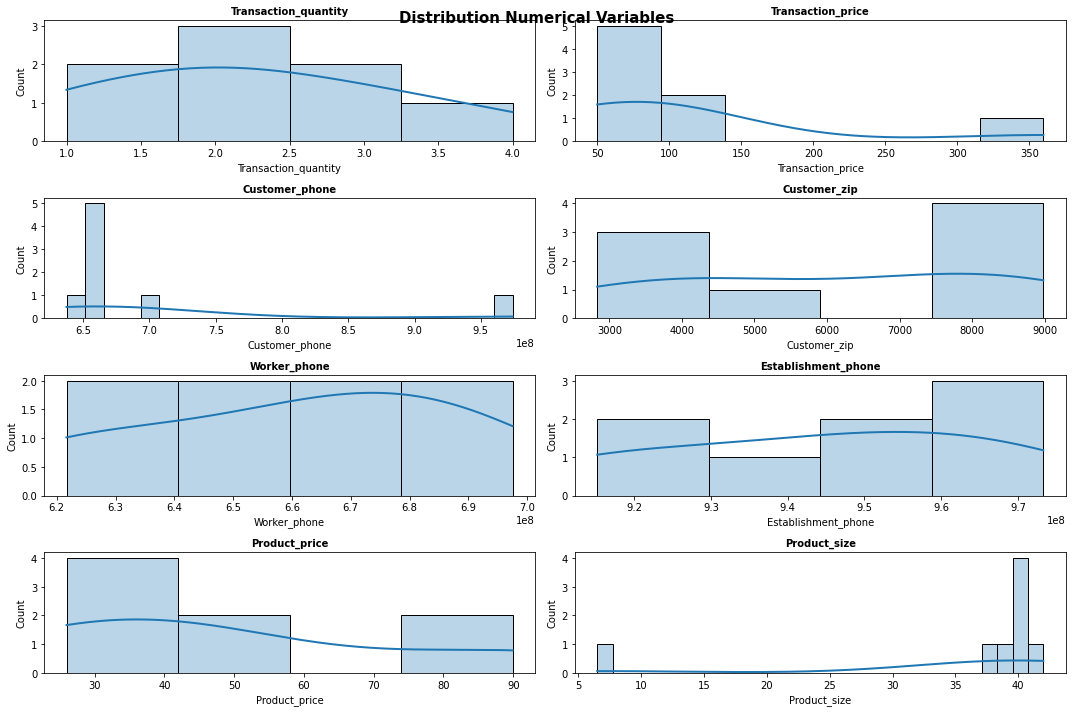

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (15,10))
axes = axes.flat
numerical_columns = table_in_one.select_dtypes(include = 'number').columns

for i, column in enumerate(table_in_one[numerical_columns]):
    sns.histplot( data = table_in_one, x = column, stat = 'count', kde = True, line_kws= {'linewidth':2}, alpha = 0.3, ax = axes[i])
    axes[i].set_title(column, fontsize = 10, fontweight = 'bold')

fig.tight_layout()
fig.suptitle('Distribution Numerical Variables', fontsize = 15, fontweight = 'bold') 
plt.show()

## **STRING VARIABLES**

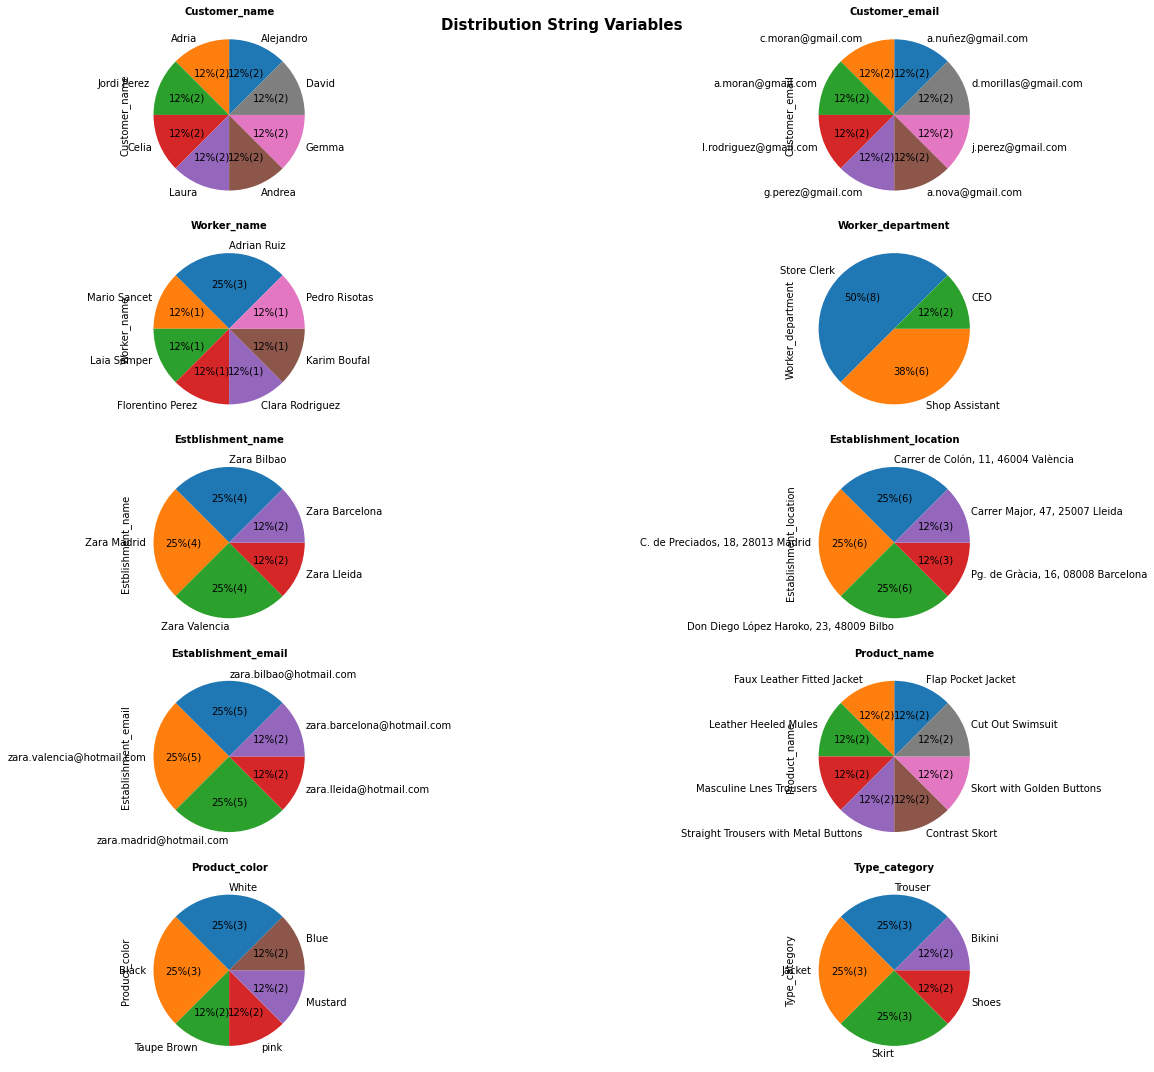

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 5, figsize = (20,15))
axes = axes.flat

string_columns = table_in_one.select_dtypes(include= 'object').columns
for i, column in enumerate(string_columns):
    plot = table_in_one[column].value_counts().plot(kind = 'pie', startangle=45, autopct=lambda p: '{:.0f}%({:.0f})'.format(p,(p/100)*len(column)) ,ax = axes[i])
    axes[i].set_title(column, fontsize = 10, fontweight = 'bold')


fig.tight_layout()
fig.suptitle('Distribution String Variables', fontsize = 15, fontweight = 'bold') 
plt.show()